In [1]:
#GOAL - Using the data collected from existing customers,
#build a model that will help the marketing team identify potential
#customers who are relatively more likely to subscribe term deposit
#and thus increase their hit ratio.

#Import tools

import numpy as np  #linear algebra
import pandas as pd  #data processing, CSV file (pd.read_csv)
import matplotlib.pyplot as plt  #plot data
%matplotlib inline
import seaborn as sns  #import seaborn
from sklearn.model_selection import train_test_split  #sklearn data splitting
from sklearn import metrics  #calculate accuracy measures
from sklearn.linear_model import LogisticRegression

import warnings

warnings.filterwarnings('ignore')

In [2]:
#load dataset
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [6]:
print(data.head())  #check first 5 rows of dataset
print()
print(data.info())  #index & column dtypes
print()
print(data.shape)  #check number of columns and rows
print()
print(data.isnull().sum())  #check for null values
print()
print(data.nunique())  #check for unique values in each column

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (tota

In [172]:
print(data.describe().transpose())  #summary statistics of each variable
print()

                     count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.

In [173]:
#Treatment of Missing Values - replace with median values
data.median()  #generate median values for each column

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [174]:
#replace every column's missing value with the median value
medianFiller = lambda x: x.fillna(x.median())
data = data.apply(medianFiller, axis=0)

In [175]:
#verify successful replacement of missing values with median values
print(data.isnull().sum())  #check for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [176]:
data = data.drop('ID', axis=1)  #drop ID column from data frame

In [177]:
data.head()  #verify column ID dropped from dataframe

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [178]:
#Number of clients with 0 mortgage
ZeroMortgageClients = (
    data['Mortgage'] == 0).sum()  #find the number of clients with 0 mortage
print(f"Number of Clients with Zero Mortgage: {ZeroMortgageClients}")

Number of Clients with Zero Mortgage: 3462


In [7]:
#Number of clients with 0 credit card spending
ZeroCC_Clients = (
    data['CCAvg'] == 0).sum()  #find the number of clients with 0 mortage
print(f"Number of Clients with Zero Credit Card Spending: {ZeroCC_Clients}")

Number of Clients with Zero Credit Card Spending: 106


In [180]:
#Value counts of all categorical variables: Family, Education, Personal Loan, Securities Account, CD Account, Online, Credit Card
data['Family'].value_counts()  #family value counts

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [181]:
data['Education'].value_counts()  #education value counts

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [182]:
data['Personal Loan'].value_counts()  #personal loan value counts

0    4520
1     480
Name: Personal Loan, dtype: int64

In [183]:
data['Securities Account'].value_counts(
)  #Securities Account value counts  ###Few securities accts

0    4478
1     522
Name: Securities Account, dtype: int64

In [184]:
data['CD Account'].value_counts(
)  #CD Accounts value counts  ###Very few CD Accounts

0    4698
1     302
Name: CD Account, dtype: int64

In [185]:
data['Online'].value_counts(
)  #online value counts  ### - close to 60% of clients bank online

1    2984
0    2016
Name: Online, dtype: int64

In [186]:
data['CreditCard'].value_counts(
)  #credit card value counts  #### 30% are credit card holders

0    3530
1    1470
Name: CreditCard, dtype: int64

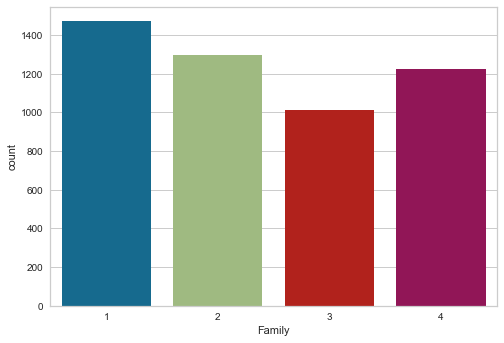

In [187]:
#UNIVARIATE & BIVARIATE VISUALIZATIONS
sns.countplot(data['Family'])
plt.show()

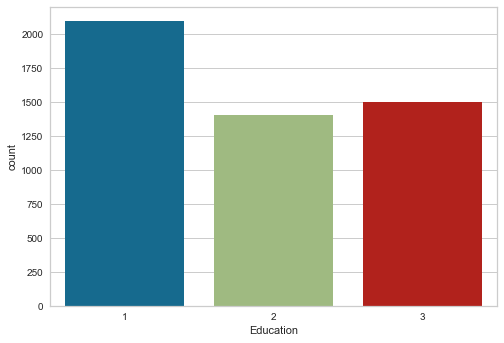

In [188]:
sns.countplot(
    data['Education'])  ### Most clients have Undergrad level education (Blue)
plt.show()

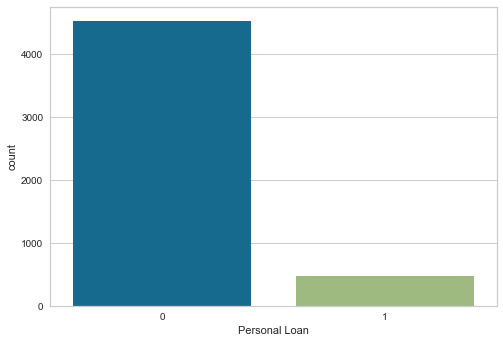

In [189]:
sns.countplot(data['Personal Loan'])
plt.show()

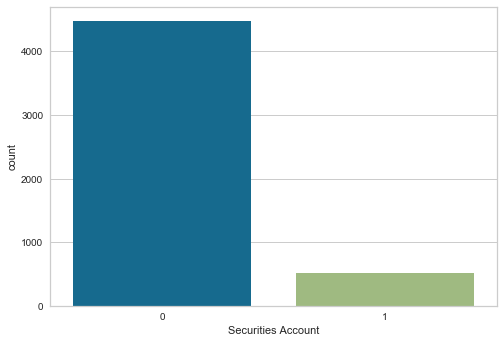

In [190]:
sns.countplot(data['Securities Account'])
plt.show()

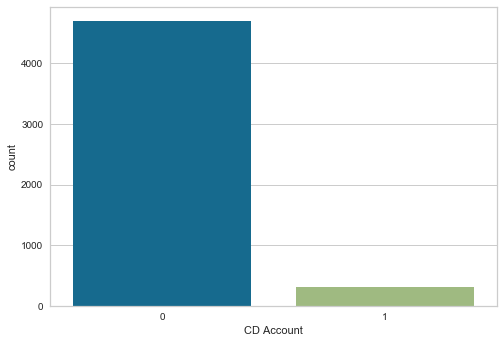

In [191]:
sns.countplot(data['CD Account'])
plt.show()

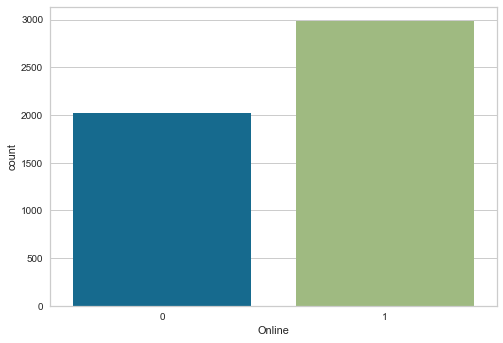

In [192]:
sns.countplot(data['Online'])
plt.show()

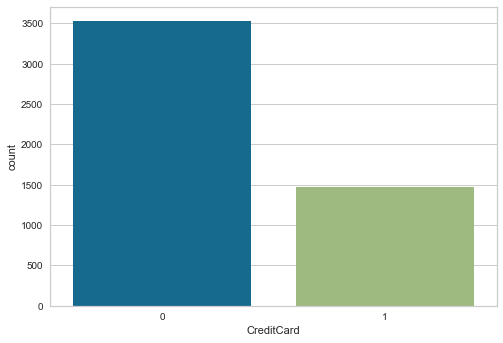

In [193]:
sns.countplot(data['CreditCard'])

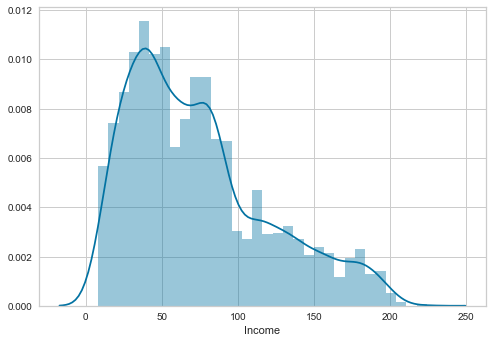

In [194]:
sns.distplot(data['Income'])
plt.show()

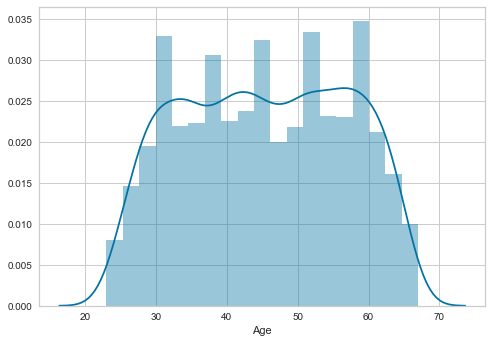

In [195]:
sns.distplot(data['Age'])
plt.show()

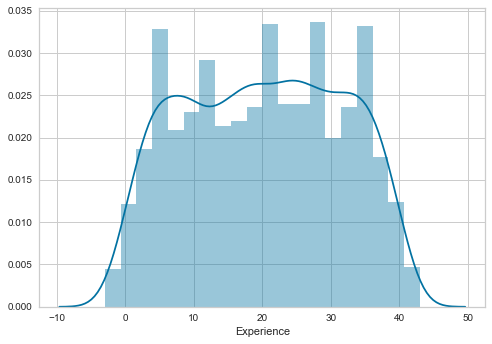

In [196]:
sns.distplot(data['Experience'])
plt.show()

In [197]:
data.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [198]:
#plot graphical correlation of the data
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)


#### - Although we are interested in personal loan, we see a strong correlation between Age and Years of Experience

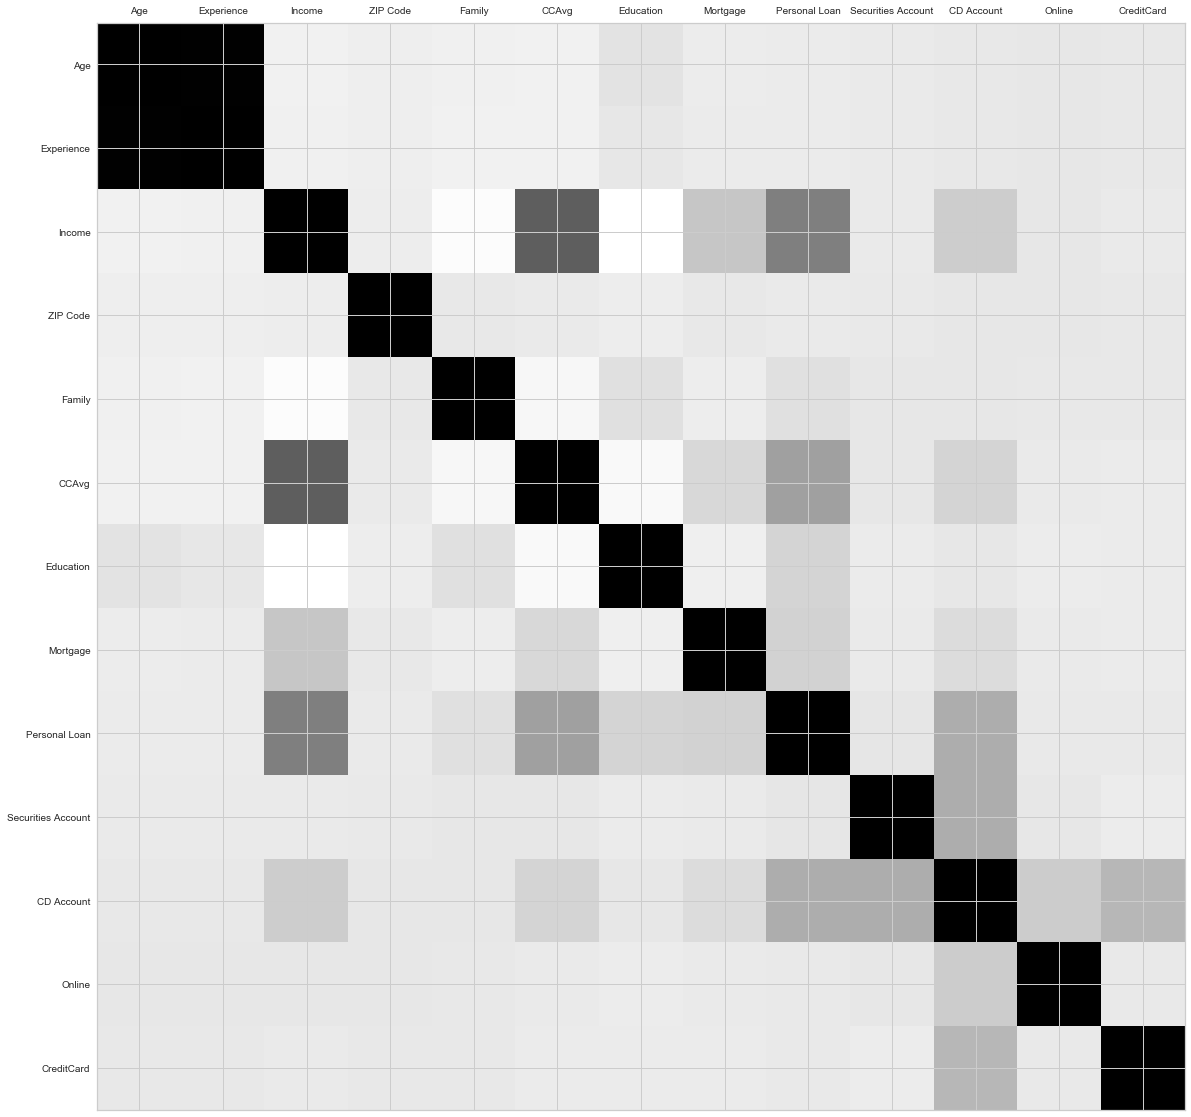

In [199]:
plot_corr(
    data
)  #graphical correlation - ###We also have a positive correlation between CC Average Balance & Income

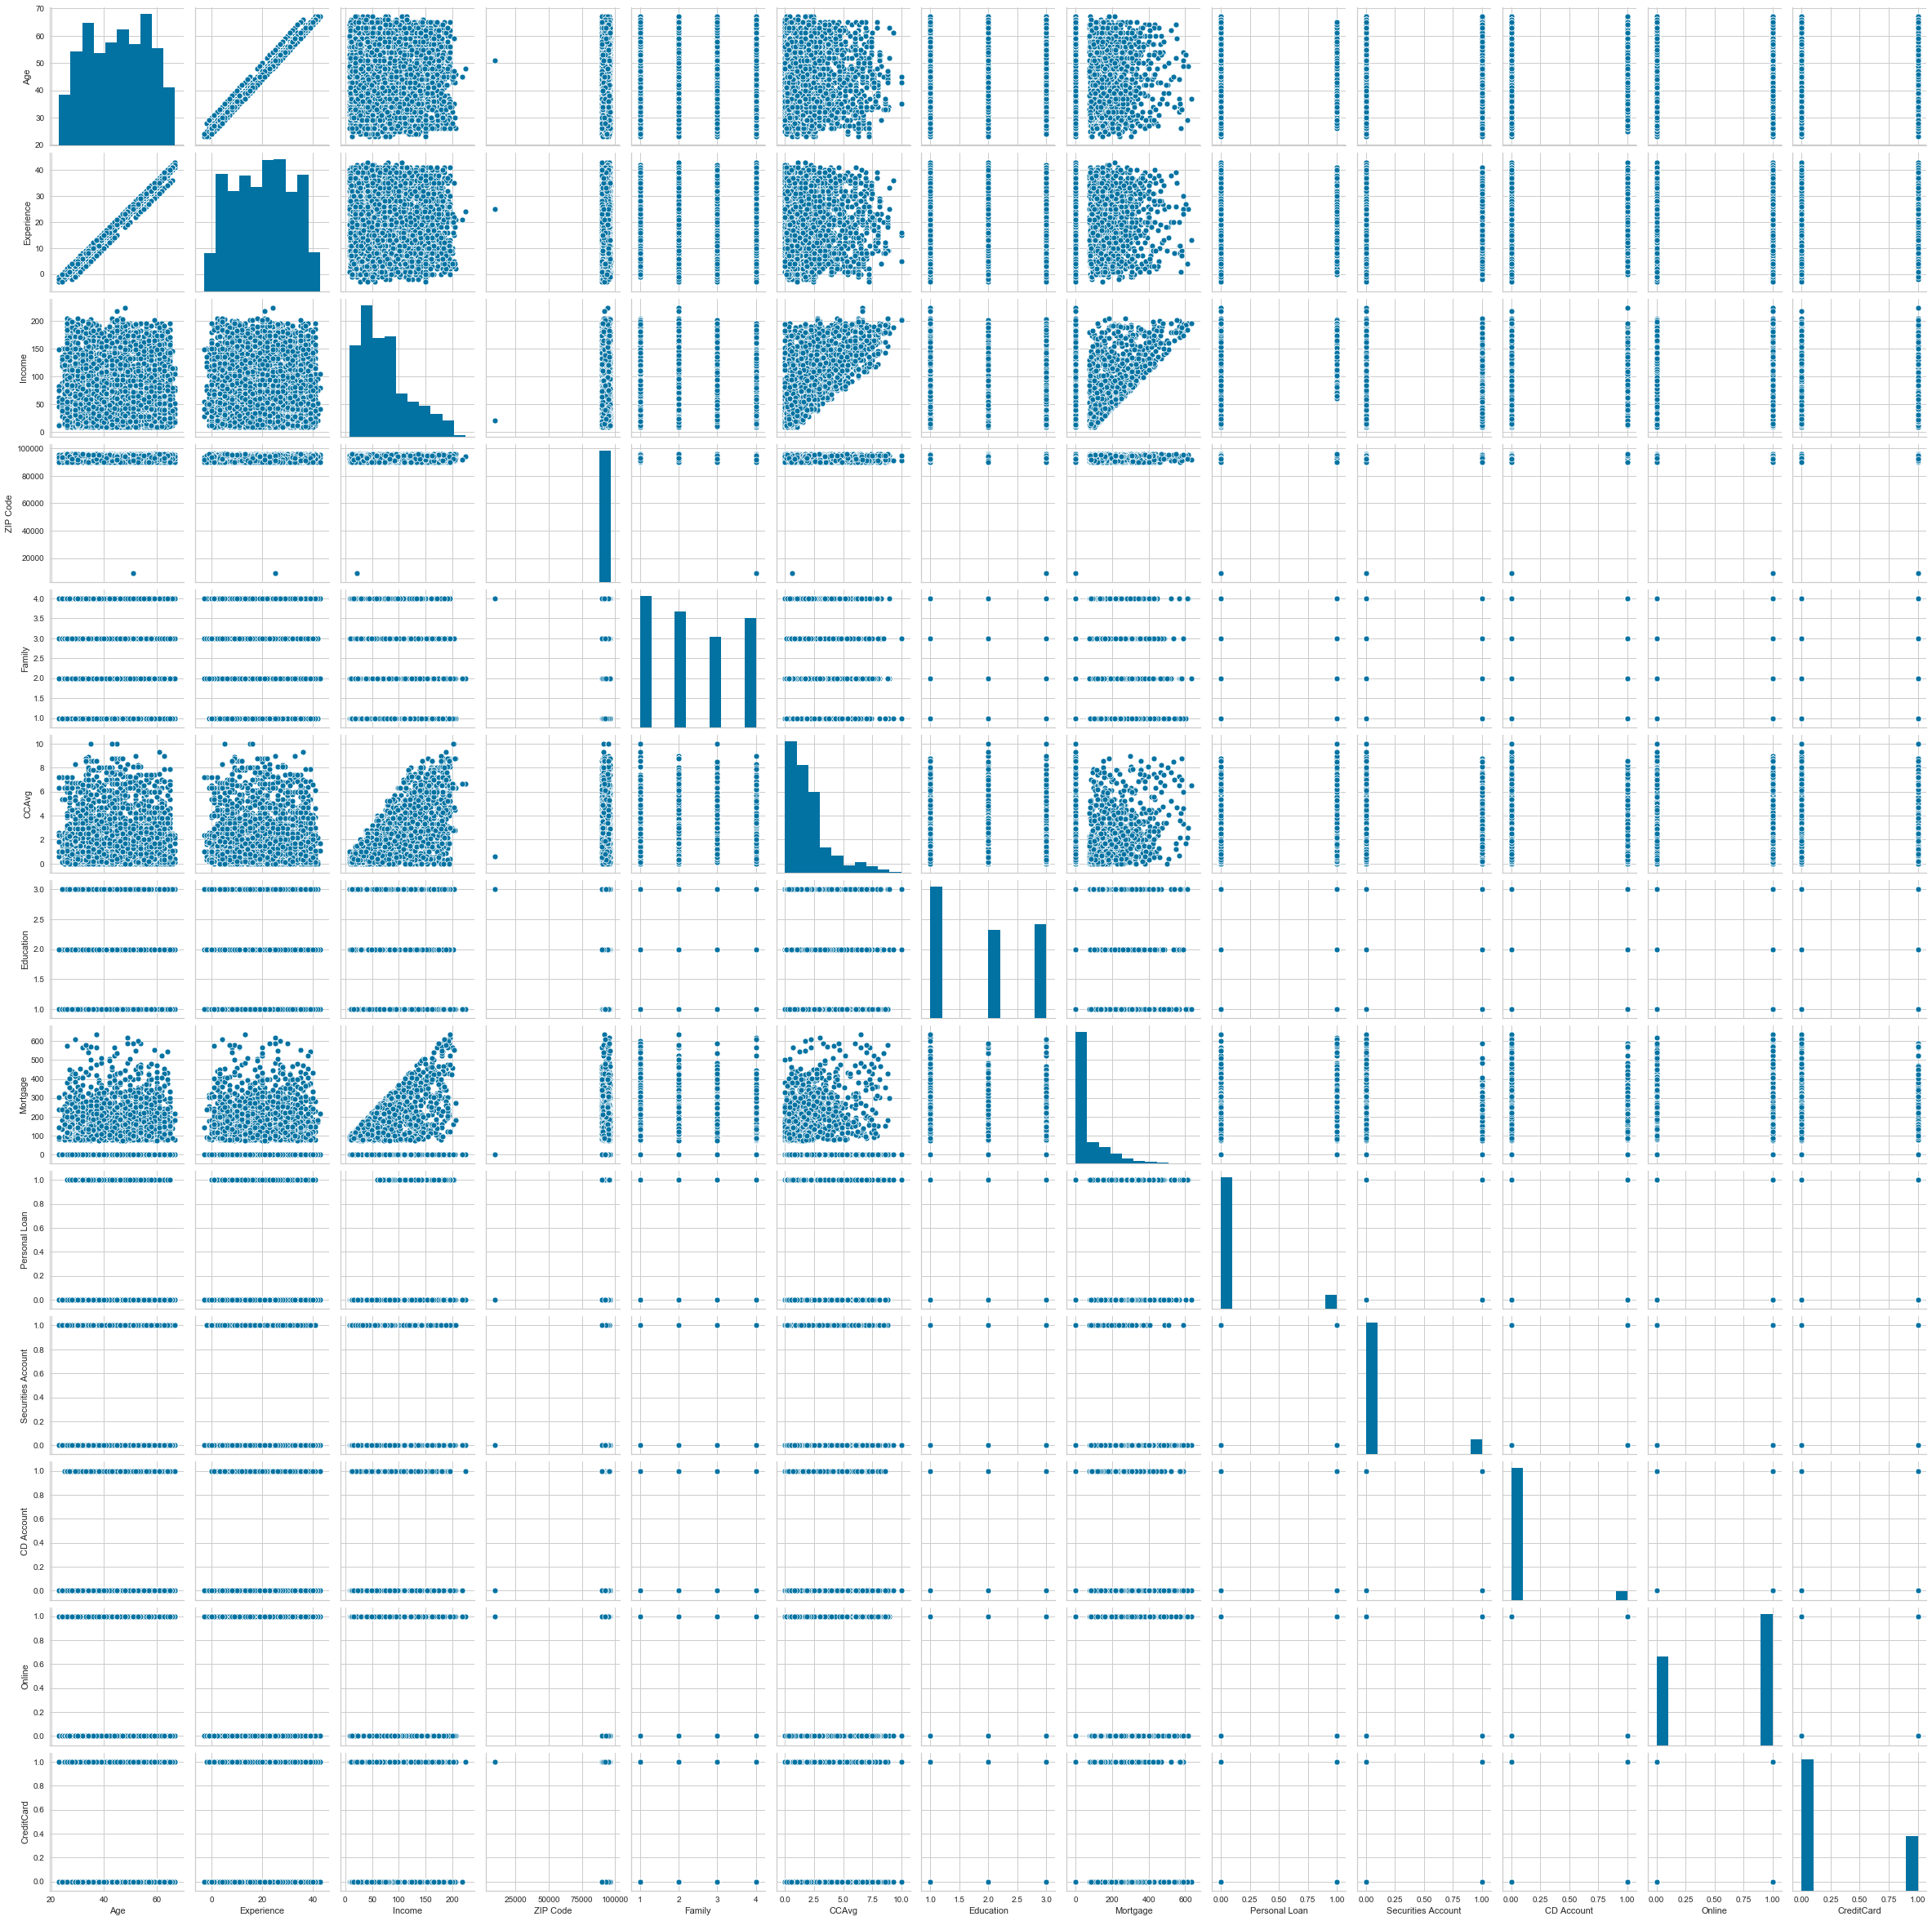

In [200]:
sns.pairplot(data)  #generate pairplots of all variables

In [202]:
#Calculate ratio of Accept/Reject Personal Loans
n_true = (data['Personal Loan'] == 1).sum()  #total accepted personal loan
n_false = (data['Personal Loan'] == 0).sum()  #total rejected personal loan
ratio_true = (n_true / 5000) * 100  #calculate ratio that accept personal loan
ratio_false = (n_false /
               5000) * 100  #calculate ratio that reject personal loan
print(f"Number of True Cases: {n_true} ({ratio_true}%)")
print(f"Number of False Cases: {n_false}  ({ratio_false}%)")

Number of True Cases: 480 (9.6%)
Number of False Cases: 4520  (90.4%)


In [203]:
#3 SPLIT THE DATA SET INTO TRAINING & TEST SET RATIO 70:30

X = data.drop('Personal Loan', axis=1)  #predictor feature columns

Y = data['Personal Loan']  #Predicted personal loan (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=7)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,59,34,94,93940,3,0.5,1,0,0,0,0,1
2496,63,37,32,93117,3,0.7,2,141,0,0,0,0
2469,43,18,89,92780,1,0.1,2,307,0,0,0,1
1375,50,26,179,92612,1,2.9,3,0,0,0,0,1
2742,39,14,89,95762,2,0.4,1,0,0,0,1,0


In [204]:
#verify data split
print("{0:0.2f}% data is in training set".format(
    (len(x_train) / len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format(
    (len(x_test) / len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [205]:
#Reference of dataframe for my own joy .....lol...check for any hidden values or 0 that need to be replaced with mean
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [211]:
#4. Use Logistic Regression model to predict whether the customer will take personal loan or
#not. Print all the metrics related for evaluating the model performance (15 marks)

#Fit the model on the train
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, auc, roc_curve

model = LogisticRegression(penalty="l1", solver="liblinear", random_state=7)
model.fit(x_train, y_train)

#predict on test

y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4        5         6  \
0 -0.090633  0.099867  0.049234 -0.000063  0.719063  0.15492  1.593507   

          7         8         9        10        11  intercept  
0  0.000644 -0.637687  3.388893 -0.553639 -1.069562   -4.63633  


In [215]:
# Observe the predicted and observed classes in a dataframe.
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
3406,42,12,34,92177,3,2.0,3,0,0,0,0,1,0,0
757,52,28,81,91745,3,1.8,2,0,1,0,0,0,0,0
3624,58,28,70,92028,1,1.4,3,0,0,0,0,0,0,0
4544,28,4,80,95819,3,2.5,1,0,0,0,1,0,0,0
3235,60,35,39,91711,2,1.6,3,0,0,0,1,0,0,0


In [216]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9546666666666667


In [217]:
cm = metrics.confusion_matrix(y_test, y_predict,
                              labels=[1, 0])  #generate a confusion matrix
print(cm)

[[  88   50]
 [  18 1344]]


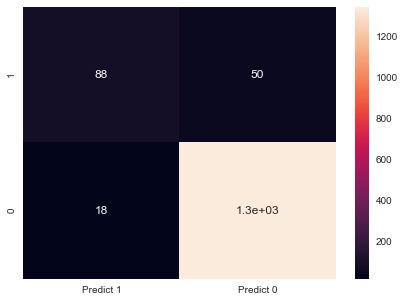

In [218]:
#create a visual confusion matrix
df_cm = pd.DataFrame(cm,
                     index=[i for i in ["1", "0"]],
                     columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)

In [219]:
#Classification Report - Precision, Recall, F1 values
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.83      0.64      0.72       138

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [220]:
#Accuracy Score
print('Total Accuracy : ', np.round(accuracy_score(y_test, y_predict), 2))

Total Accuracy :  0.95


In [221]:
print("Roc Auc Score:", roc_auc_score(y_test, y_predict))

Roc Auc Score: 0.8122326501947263


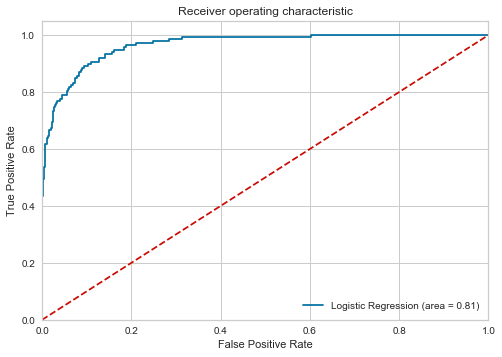

In [222]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#5. While tuning the model, I adjusted the penalty, solver and random state parameters.
#The solver parameter seemed to have the most effect on the ROC score and accuracy.
#When we changed 'solver' from 'saga' to 'liblinear' we saw an increase in the ROC score.
#With the additional adjustment of our penalty parameter
#from L2 to L1, and solver=liblinear with random state=7, we achieved a target ROC score
#greater than 80 (.81) and accuracy score of .95.

#6. Give Business understanding of your model? (5 marks)

###Confusion Matrix Results
#True Positive(TP): We correctly predicted 88 would take personal loan
#True Negative(TN):  We correctly predicted that 1344 would reject the personal loan
#False Positive(FP): 32 (Type I Error) We predicted 50 positives that actually rejected the loan.
#False Negative (FN): 106 (Type II Error) We predicted 18 negatives on people who actually accepted the loan.

#Our F1 score of .99 & .72 tells us our model is good.
#Our ROC curve is far away from the diagonal which indicates our model is doing well at discriminating between positives and negatives in general.

#We were able to correctly predict most of the outcomes although we overshot on the number of people we predicted would accept a personal loan.
#The 50 that we expected however, were offset by the 18 accepted personal loans that we did not expect.
#Overall, the model is good for business and we can make the offer again for those who missed out on the first offer.